## Exercise 1

### Question 1

Use the market prices on the day before the election to predict the 2008 election outcome.

In [1]:
import pandas as pd
import numpy as np

In [2]:
intrade08 = pd.read_csv('intrade08.csv')
intrade12 = pd.read_csv('intrade12.csv')
pres08 = pd.read_csv('pres08.csv')
pres12 = pd.read_csv('pres12.csv')

In [3]:
intrade08.head()

,Unnamed: 0,day,statename,PriceD,VolumeD,PriceR,VolumeR,state
0,1,2006-11-12,Alabama,40.0,0,40.0,0,AL
1,2,2006-11-12,Alaska,40.0,0,40.0,0,AK
2,3,2006-11-12,Arizona,40.0,0,40.0,0,AZ
3,4,2006-11-12,Arkansas,40.0,0,40.0,0,AR
4,5,2006-11-12,California,40.0,0,40.0,0,CA


In [4]:
# add daily margin of prices to the intrade08 dataset
# the sign is + if Obama wins, - if McCain wins

intrade08['margin'] = intrade08['PriceD'] - intrade08['PriceR']

In [5]:
# subset the data such that it contains the market information for each state 
# and candidate on the day before the election only. 

intrade08['day'] = pd.to_datetime(intrade08['day'], format='%Y-%m-%d') 
filtered_df = intrade08.loc[(intrade08['day'] == '2008-11-03')]

In [6]:
filtered_df = filtered_df.reset_index()
filtered_df['day'].unique()

array(['2008-11-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [7]:
filtered_df.head()

,index,Unnamed: 0,day,statename,PriceD,VolumeD,PriceR,VolumeR,state,margin
0,36770,36771,2008-11-03,Alabama,3.3,0,95.0,90,AL,-91.7
1,36771,36772,2008-11-03,Alaska,6.0,32,94.0,58,AK,-88.0
2,36772,36773,2008-11-03,Arizona,18.9,1662,80.2,139,AZ,-61.3
3,36773,36774,2008-11-03,Arkansas,3.9,11,90.0,5,AR,-86.1
4,36774,36775,2008-11-03,California,97.9,100,2.1,10,CA,95.8


Compare the closing prices for the two candidates in a given state and classify a candidate whose contract has a higher price as the predicted winner of that state.

In [8]:
# check if there is any equal prices
len(filtered_df[filtered_df['PriceD'] == filtered_df['PriceR']])

# There is none. So we can continue without considering such a situation.

0

In [9]:
# add a 'winner' column to filtered_df
 
conditions = [filtered_df['margin'] > 0,
             filtered_df['margin'] < 0]
choices = ['Obama', 'McCain']

filtered_df['winner'] = np.select(conditions, choices)

In [10]:
filtered_df.head()

,index,Unnamed: 0,day,statename,PriceD,VolumeD,PriceR,VolumeR,state,margin,winner
0,36770,36771,2008-11-03,Alabama,3.3,0,95.0,90,AL,-91.7,McCain
1,36771,36772,2008-11-03,Alaska,6.0,32,94.0,58,AK,-88.0,McCain
2,36772,36773,2008-11-03,Arizona,18.9,1662,80.2,139,AZ,-61.3,McCain
3,36773,36774,2008-11-03,Arkansas,3.9,11,90.0,5,AR,-86.1,McCain
4,36774,36775,2008-11-03,California,97.9,100,2.1,10,CA,95.8,Obama


In [11]:
# add a 'winner' column to pres08 but this time with another method
 
pres08['winner'] = np.where(pres08['Obama'] > pres08['McCain'], 'Obama', 'McCain')

In [12]:
pres08.head()

,state.name,state,Obama,McCain,EV,winner
0,Alabama,AL,39,60,9,McCain
1,Alaska,AK,38,59,3,McCain
2,Arizona,AZ,45,54,10,McCain
3,Arkansas,AR,39,59,6,McCain
4,California,CA,61,37,55,Obama


In [13]:
# set a common index for the both dataframes
# but first check if the columns we are going to set as indexes match

filtered_df['statename'] == pres08['state.name']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
dtype: bool

In [14]:
# They don't match. The 8th and 9th rows are problematic.
# If we look closer, abbreviation 'D.C' is used for the District of Columbia in pres08

pres08.iloc[7,0] = 'District of Columbia'


In [15]:
filtered_df.set_index(filtered_df.statename, inplace=True)
pres08.set_index(pres08['state.name'], inplace=True)

In [16]:
filtered_df.index == pres08.index

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [17]:
filtered_df.sort_index(inplace=True)
pres08.sort_index(inplace=True)


In [18]:
filtered_df.index == pres08.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [19]:
# Which states were missclassified?
filtered_df.loc[(pres08['winner'] != filtered_df['winner'])]

,index,Unnamed: 0,day,statename,PriceD,VolumeD,PriceR,VolumeR,state,margin,winner
statename,,,,,,,,,,,
Indiana,36784,36785,2008-11-03,Indiana,39.0,945,62.2,641,IN,-23.2,McCain
Missouri,36795,36796,2008-11-03,Missouri,55.6,579,48.0,170,MO,7.6,Obama


### Question 2

How do the predictions based on the betting markets change over 90 days period of time?

In [20]:
filtered_df2 = intrade08.copy()
filtered_df2['day'] = pd.to_datetime(filtered_df2['day']) 

In [21]:
# My first approach to figuring out the date which is 90 days before the election date. 
# And it is a really cool one, and it works. But another approach below is run for this notebook.

# filtered_df2['90_days'] = np.where(filtered_df2['day'] + pd.Timedelta(3, unit='D') <  '2008-11-03', "90 days overdue", "OK")

In [22]:
# The second approach to figuring out the date which is 90 days before the election date

# import the datetime module
from datetime import datetime
x = datetime.strptime('2008-11-04', '%Y-%m-%d')
y = datetime.strptime('2008/8/6', '%Y/%m/%d')

# number of days between 2008/8/6 and 11/4/2008
x-y # a timedelta object

datetime.timedelta(90)

In [23]:
# filter filtered_df2 further based on the desired time period
filtered_df2 = filtered_df2[(filtered_df2['day'] < x) & (filtered_df2['day'] > y)]

In [24]:
# We will need to create an Electral Votes column for filtered_df2.  
# The values to this column will be taken from pres08

# But first, confirm that the values of 'statename' and 'state.name' columns match again
filtered_df2.iloc[:52, 2].values.sort() == pres08.iloc[:, 0].values.sort()

True

In [25]:
# get EV values from pres08
state_name = pres08['state.name'].values.tolist()
ev = pres08['EV'].values.tolist()

# the empty list that will be joined later to filtered_df2.
ev_for_filtered_df2 = []

# loop for filling ev_for_filtered_df2, which is an empty list yet.
for state in filtered_df2['statename'].values.tolist():
    i = state_name.index(state)
    ev_for_filtered_df2.append(ev[i])

In [26]:
# turn the list into a Series object with the indexes matching with the dataset to-be-joined
ev_for_filtered_df2 = pd.Series(ev_for_filtered_df2, index = filtered_df2.index)

# join ev_for_filtered_df2 with filtered_df2
filtered_df2 = filtered_df2.join(ev_for_filtered_df2.rename('EV'))

In [27]:
filtered_df2

,Unnamed: 0,day,statename,PriceD,VolumeD,PriceR,VolumeR,state,margin,EV
32282,32283,2008-08-07,Alabama,7.0,0,93.0,0,AL,-86.0,9
32283,32284,2008-08-07,Alabama,23.0,0,76.0,1,AK,-53.0,9
32284,32285,2008-08-07,Alaska,11.0,0,89.0,0,AZ,-78.0,3
32285,32286,2008-08-07,Arizona,15.1,0,84.9,0,AR,-69.8,10
32286,32287,2008-08-07,Arkansas,90.0,0,10.0,0,CA,80.0,6
...,...,...,...,...,...,...,...,...,...,...
36816,36817,2008-11-03,Virginia,86.1,1491,12.1,739,VA,74.0,13
36817,36818,2008-11-03,Washington,96.0,0,4.0,1,WA,92.0,11
36818,36819,2008-11-03,West Virginia,8.0,30,88.1,7,WV,-80.1,5
36819,36820,2008-11-03,Wisconsin,95.0,0,5.1,0,WI,89.9,10


In [28]:
# Duplicate the EV column in the dateset with a new name 'EV_Obama'. 
# We will then turn the 'EV_Obama' values where Obama was not the winner to zero 

# The same code above
filtered_df2 = filtered_df2.join(ev_for_filtered_df2.rename('EV_Obama'))

In [29]:
# turn the 'EV_Obama' values where Obama was not the winner to zero
for i in range(len(filtered_df2['EV_Obama'])):
    if (filtered_df2['margin'].iloc[i] < 0):
        filtered_df2['EV_Obama'].iloc[i] = 0
    else:
        pass

/home/sudenur/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
filtered_df2['EV_Obama'].head()

32282    0
32283    0
32284    0
32285    0
32286    6
Name: EV_Obama, dtype: int64

In [31]:
# groupby according to 'day' column and find the sum of Obama's electoral votes in each day
filtered_df2 = filtered_df2.groupby('day')['EV_Obama'].sum()
filtered_df2 = filtered_df2.reset_index()
filtered_df2

,day,EV_Obama
0,2008-08-07,255
1,2008-08-08,311
2,2008-08-09,306
3,2008-08-10,306
4,2008-08-11,311
...,...,...
84,2008-10-30,364
85,2008-10-31,364
86,2008-11-01,364
87,2008-11-02,353


In [32]:
# get the actual election result 
pres08.groupby('winner')['EV'].sum()

winner
McCain    174
Obama     364
Name: EV, dtype: int64

Plot the predicted number of electoral votes for the Democratic Party nominee over 90-day period. 

Text(2008-10-23 00:00:00, 340, 'actual election result')

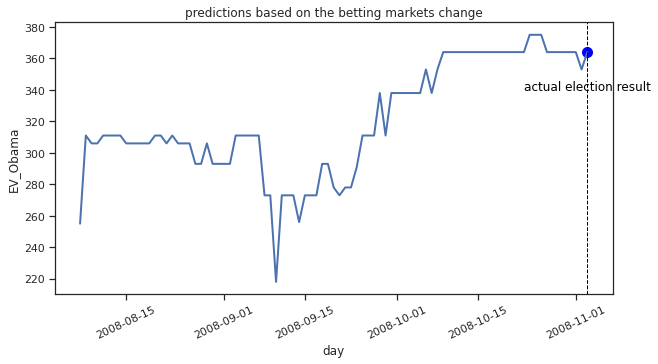

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))

# create time-series plot
sns.lineplot(data = filtered_df2, x = 'day', y = 'EV_Obama', linewidth=2
            ).set(title='predictions based on the betting markets change')

plt.xticks(rotation = 25)

# line indicating actual election result
plt.axvline(x=filtered_df2['day'].max(), color='black', linestyle='--', linewidth=1)

# actual election result
plt.scatter(filtered_df2['day'].max(), 364, color='blue', s=100)

# add a text label 
plt.text(x=filtered_df2['day'].max() - pd.Timedelta(11, unit='D'), y=340, 
         s='actual election result', color='black')

### Question 3

Repeat the previous exercise but this time use the seven-day moving-average price, 
instead of the daily price, for each candidate within a state.

In [34]:
# filter intrade08 based on the desired time period (we want 90 days-period as the previous exercise)
filtered_df3 = intrade08[(intrade08['day'] < x) & (intrade08['day'] > y)]

In [35]:
# find the number of days to the election
filtered_df3['days_to_election'] = (x - filtered_df3['day']).dt.days

# empty numpy vectors to store closing prices for Obama and McCain
Obama_price = np.zeros(90)
McCain_price = np.zeros(90)

/home/sudenur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
for i in range(len(Obama_price)):
    # take all closing prices within the past 7 days
    week_data = (filtered_df3[(filtered_df3['days_to_election'] <= (90 - (i + 1) + 7)) 
                             & (filtered_df3['days_to_election'] >(90 - (i + 1)))])
    
    # compute the mean of the polls for Obama and McCain
    Obama_price[i] = week_data['PriceD'].mean()
    McCain_price[i] = week_data['PriceR'].mean()
    
    # put together a data frame for plotting
    price08_weekly_avg = pd.DataFrame({'Obama': Obama_price,
                                      'McCain': McCain_price,
                                      'days_to_election': np.arange(90, 0, -1)})

In [37]:
price08_weekly_avg.head()

,Obama,McCain,days_to_election
0,NaN,NaN,90
1,49.978431,50.107843,89
2,50.078431,49.964706,88
3,49.934641,50.094118,87
4,49.867647,50.163235,86


In [38]:
# reshape the data for plotting purposes
price08_weekly_avg_reshaped =  price08_weekly_avg.melt(id_vars='days_to_election',
                                                      var_name='Candidate',
                                                      value_name='price_avg')

price08_weekly_avg_reshaped

,days_to_election,Candidate,price_avg
0,90,Obama,NaN
1,89,Obama,49.978431
2,88,Obama,50.078431
3,87,Obama,49.934641
4,86,Obama,49.867647
...,...,...,...
175,5,McCain,43.763305
176,4,McCain,43.991036
177,3,McCain,44.325490
178,2,McCain,44.484874


Text(10, 59, 'election day')

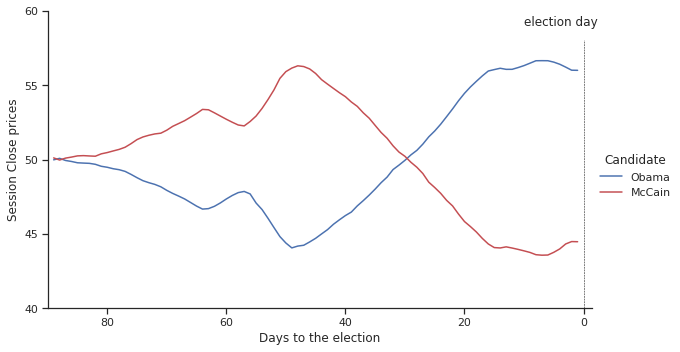

In [39]:
sns.set_theme(style="ticks")

# plot going from 90 days to 1 day before the election
sns.relplot(
    data=price08_weekly_avg_reshaped, x='days_to_election', y='price_avg', 
    hue='Candidate', kind='line', height=5, aspect=1.7,
    palette=['b', 'r']
).set(ylim=(40, 60), yticks=range(40, 61, 5), 
      xlim=(90, -1.5), # small buffer in right limit for aesthetics
      xlabel='Days to the election', 
      ylabel='Session Close prices')

# line indicating election day
plt.plot([0, 0], [0, 58],color='black', linestyle='--', linewidth=0.5 )
plt.text(x=10, y=59, s='election day')


Next, sum the electoral votes for the states Obama is predicted to win.

In [40]:
# We had already computed the sum of Obama's electoral votes in each day for the question 2,
# for 90-days period.
filtered_df2['EV_Obama'].head()

0    255
1    311
2    306
3    306
4    311
Name: EV_Obama, dtype: int64

### Question 4

In [30]:
# Coming soon!